<a href="https://colab.research.google.com/github/envirodatascience/final-project-insect-team/blob/main/04_climate_insects_analyses_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook overview
Using the cleaned and summarized data from 03_ypm_insect_downloading_cleaning.ipynb and the climate data from 02_temperature_data.ipynb to plot and analyze relationships between insect species and climate patterns over time.

# Load modules

In [89]:
# General
import pandas as pd
import numpy as np

# Plotting
from plotnine import *
import plotnine
from mizani.formatters import scientific_format, percent_format, currency_format

# Stats
import statsmodels.api as sm
import scipy.stats as stats

## Subset dataset to CT only and the most interesting orders for joining to climate data

In [90]:
# read in data manually loaded into runtime files or frmo GitHub
url = 'https://raw.githubusercontent.com/envirodatascience/final-project-insect-team/main/ypm_ent_taxo_summaries_20250424.csv'
ent = pd.read_csv(url)
ent.head()


,year,stateProvince,total_n_species,total_abundance,Lepidoptera_n_species,Lepidoptera_abundance,Hymenoptera_n_species,Hymenoptera_abundance,Coleoptera_n_species,Coleoptera_abundance,...,Poduromorpha_n_species,Poduromorpha_abundance,Nymphalidae_n_species,Nymphalidae_abundance,Apidae_n_species,Apidae_abundance,Noctuidae_n_species,Noctuidae_abundance,Papilionidae_n_species,Papilionidae_abundance
0,1901,Alaska,1,1,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1901,Arizona,1,1,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1901,California,4,6,1.0,2.0,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1901,Colorado,2,3,1.0,1.0,NaN,NaN,1.0,2.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1901,Connecticut,7,7,6.0,6.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# subset to CT
ent_ct = ent[ent.stateProvince == 'Connecticut']
ent_ct.value_counts('stateProvince') # good

,count
stateProvince,
Connecticut,124


In [92]:
ent_ct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 4 to 4165
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         124 non-null    int64  
 1   stateProvince                124 non-null    object 
 2   total_n_species              124 non-null    int64  
 3   total_abundance              124 non-null    int64  
 4   Lepidoptera_n_species        124 non-null    float64
 5   Lepidoptera_abundance        124 non-null    float64
 6   Hymenoptera_n_species        99 non-null     float64
 7   Hymenoptera_abundance        99 non-null     float64
 8   Coleoptera_n_species         100 non-null    float64
 9   Coleoptera_abundance         100 non-null    float64
 10  Diptera_n_species            95 non-null     float64
 11  Diptera_abundance            95 non-null     float64
 12  Odonata_n_species            63 non-null     float64
 13  Odonata_abundance       

In [93]:
# select just a few orders of interest
ent_ct_sub = ent_ct[['year', 'stateProvince', 'total_n_species', 'Nymphalidae_n_species', 'Apidae_n_species', 'Noctuidae_n_species', 'Lepidoptera_n_species', 'Papilionidae_n_species', 'Coleoptera_n_species']]
ent_ct_sub.head()

,year,stateProvince,total_n_species,Nymphalidae_n_species,Apidae_n_species,Noctuidae_n_species,Lepidoptera_n_species,Papilionidae_n_species,Coleoptera_n_species
4,1901,Connecticut,7,NaN,NaN,NaN,6.0,NaN,1.0
30,1902,Connecticut,7,NaN,1.0,NaN,1.0,1.0,1.0
53,1903,Connecticut,9,NaN,NaN,NaN,5.0,NaN,NaN
74,1904,Connecticut,45,NaN,5.0,NaN,4.0,NaN,NaN
99,1905,Connecticut,30,NaN,5.0,NaN,8.0,NaN,1.0


In [94]:
# select just a few orders of interest
ent_ct_sub = ent_ct[['year', 'stateProvince', 'total_n_species', 'Nymphalidae_n_species', 'Apidae_n_species', 'Noctuidae_n_species', 'Lepidoptera_n_species', 'Papilionidae_n_species', 'Coleoptera_n_species']]
ent_ct_sub.head()

,year,stateProvince,total_n_species,Nymphalidae_n_species,Apidae_n_species,Noctuidae_n_species,Lepidoptera_n_species,Papilionidae_n_species,Coleoptera_n_species
4,1901,Connecticut,7,NaN,NaN,NaN,6.0,NaN,1.0
30,1902,Connecticut,7,NaN,1.0,NaN,1.0,1.0,1.0
53,1903,Connecticut,9,NaN,NaN,NaN,5.0,NaN,NaN
74,1904,Connecticut,45,NaN,5.0,NaN,4.0,NaN,NaN
99,1905,Connecticut,30,NaN,5.0,NaN,8.0,NaN,1.0


In [95]:
# save subsetted file
ent_ct_sub.to_csv('ypm_ct_ent_taxo_summaries_20250424.csv', index=False)

## Merge datasets
Merge temp, precip, and insect datasets for CT

### Read in datasets

In [96]:
# read in precip data
url = 'https://github.com/envirodatascience/final-project-insect-team/raw/refs/heads/main/noaa_precip_yearly_ct.csv'
df_pr = pd.read_csv(url)
df_pr.head()

,DATE,PAVG,PMIN,PMAX
0,1858,41.89,41.89,41.89
1,1859,53.31,53.31,53.31
2,1860,37.38,37.38,37.38
3,1861,47.03,47.03,47.03
4,1862,48.02,48.02,48.02


In [97]:
# read in temp data
url = 'https://github.com/envirodatascience/final-project-insect-team/raw/refs/heads/main/noaa_temp_yearly_ct.csv'
df_t = pd.read_csv(url)
df_t.head()

,DATE,TMIN,TAVG,TMAX
0,1900,40.883333,51.050000,60.814286
1,1901,39.242857,49.040000,58.583333
2,1902,39.600000,49.420000,59.540000
3,1903,38.928571,48.785714,58.657143
4,1904,35.600000,46.025000,56.228571


In [98]:
# read in CT ent data
df_e = pd.read_csv('ypm_ct_ent_taxo_summaries_20250424.csv')
df_e.head()

,year,stateProvince,total_n_species,Nymphalidae_n_species,Apidae_n_species,Noctuidae_n_species,Lepidoptera_n_species,Papilionidae_n_species,Coleoptera_n_species
0,1901,Connecticut,7,NaN,NaN,NaN,6.0,NaN,1.0
1,1902,Connecticut,7,NaN,1.0,NaN,1.0,1.0,1.0
2,1903,Connecticut,9,NaN,NaN,NaN,5.0,NaN,NaN
3,1904,Connecticut,45,NaN,5.0,NaN,4.0,NaN,NaN
4,1905,Connecticut,30,NaN,5.0,NaN,8.0,NaN,1.0


In [99]:
df_e.rename(columns={'year': 'DATE'}, inplace=True)
df_e.head()

,DATE,stateProvince,total_n_species,Nymphalidae_n_species,Apidae_n_species,Noctuidae_n_species,Lepidoptera_n_species,Papilionidae_n_species,Coleoptera_n_species
0,1901,Connecticut,7,NaN,NaN,NaN,6.0,NaN,1.0
1,1902,Connecticut,7,NaN,1.0,NaN,1.0,1.0,1.0
2,1903,Connecticut,9,NaN,NaN,NaN,5.0,NaN,NaN
3,1904,Connecticut,45,NaN,5.0,NaN,4.0,NaN,NaN
4,1905,Connecticut,30,NaN,5.0,NaN,8.0,NaN,1.0


### Merge

In [100]:
# merge temp and precip
df_tp = df_t.merge(df_pr,how='outer', on='DATE')
df_tp.tail()

,DATE,TMIN,TAVG,TMAX,PAVG,PMIN,PMAX
162,2021,42.278571,51.507143,60.721429,53.334416,38.43,66.84
163,2022,40.656250,50.962500,61.305882,46.398205,34.26,57.14
164,2023,42.686667,52.173333,61.660000,62.344521,46.20,73.91
165,2024,42.162500,51.956250,61.762500,54.480676,41.60,66.27
166,2025,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# merge ent data on to climate data
df_all = df_tp.merge(df_e,how='inner', on='DATE')
df_all.head()

,DATE,TMIN,TAVG,TMAX,PAVG,PMIN,PMAX,stateProvince,total_n_species,Nymphalidae_n_species,Apidae_n_species,Noctuidae_n_species,Lepidoptera_n_species,Papilionidae_n_species,Coleoptera_n_species
0,1901,39.242857,49.040000,58.583333,59.651111,38.67,68.77,Connecticut,7,NaN,NaN,NaN,6.0,NaN,1.0
1,1902,39.600000,49.420000,59.540000,52.378571,34.96,61.85,Connecticut,7,NaN,1.0,NaN,1.0,1.0,1.0
2,1903,38.928571,48.785714,58.657143,49.262857,34.44,58.02,Connecticut,9,NaN,NaN,NaN,5.0,NaN,NaN
3,1904,35.600000,46.025000,56.228571,43.526250,38.05,48.22,Connecticut,45,NaN,5.0,NaN,4.0,NaN,NaN
4,1905,38.480000,48.740000,59.020000,41.735714,36.13,52.78,Connecticut,30,NaN,5.0,NaN,8.0,NaN,1.0


### Save data

In [102]:
df_all.to_csv('CT_insect_climate_data.csv', index=False)

## Scatter Plots of Selected Variable Pairs
- This is to visually explore potential relationships between different climate and insect variables by creating scatter plots for selected pairs of columns.

- It wil helpn us identify possible patterns, trends, or correlations that can guide further statistical analysis.

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


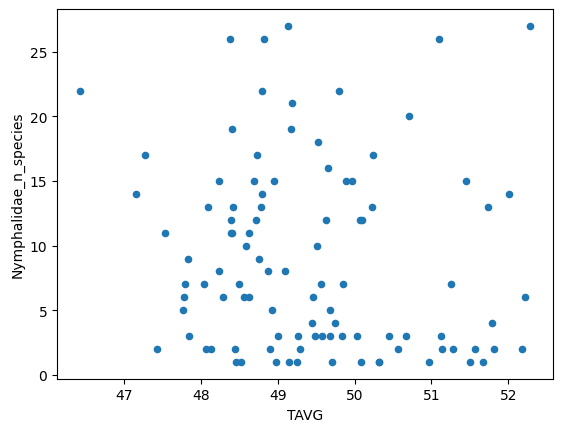

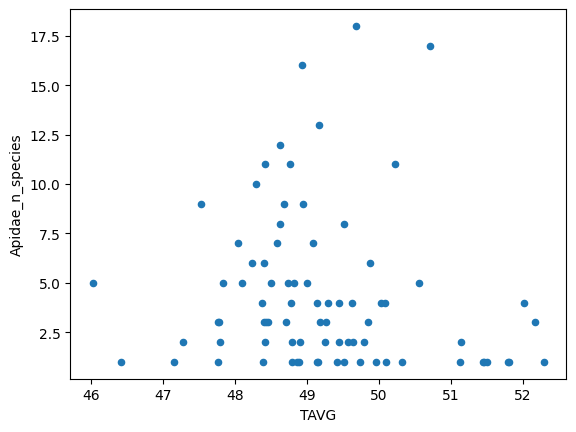

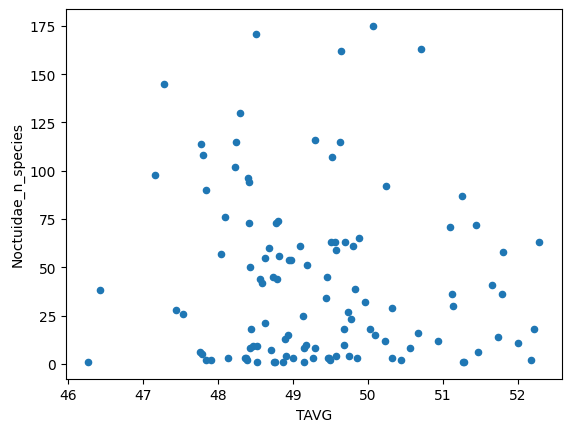

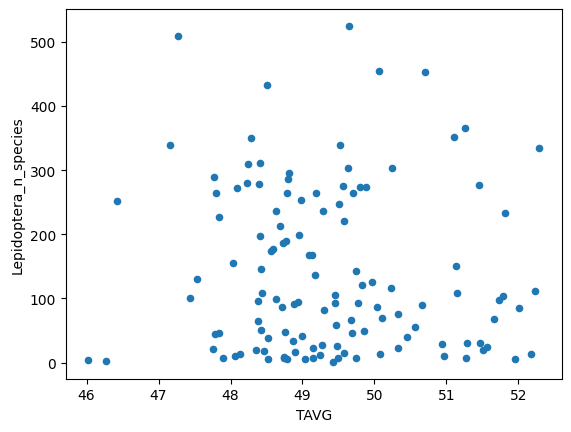

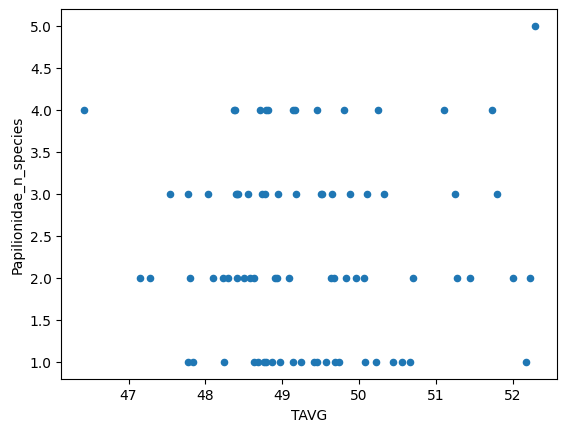

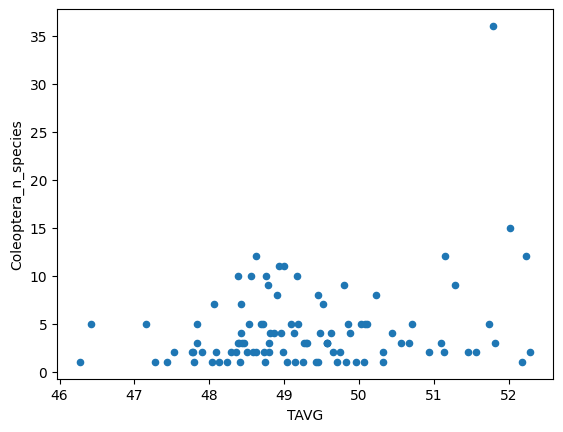

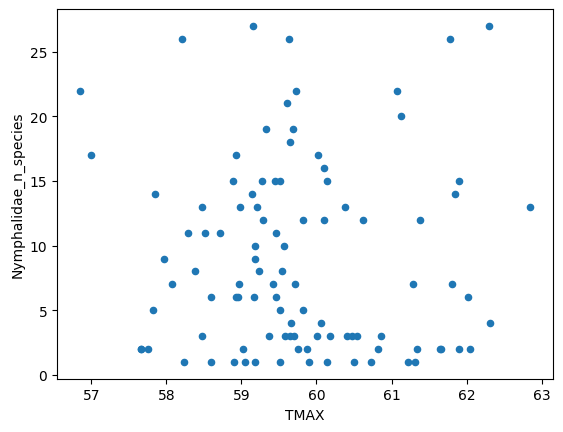

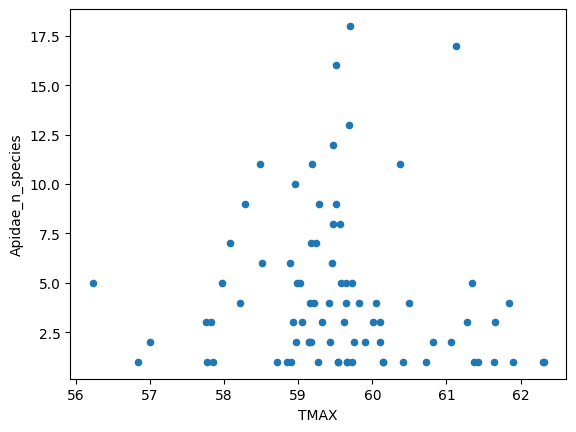

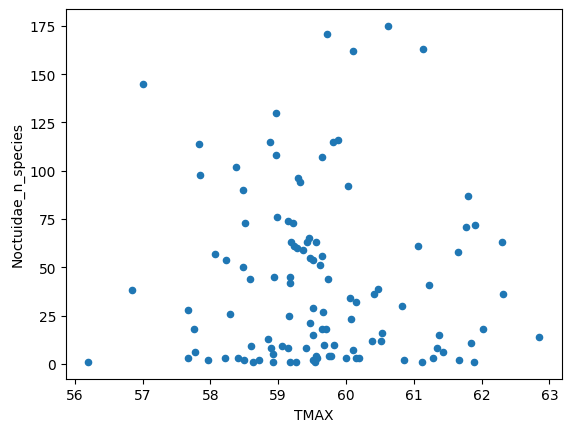

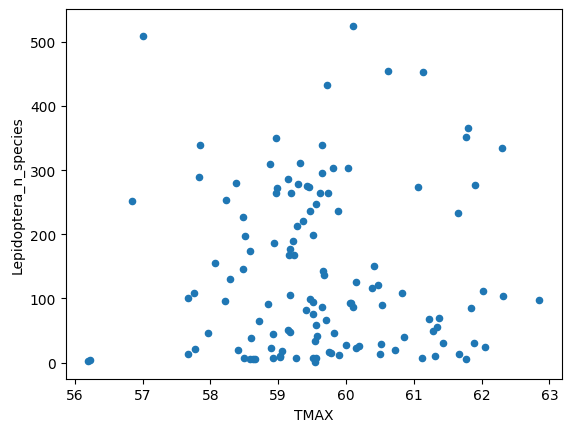

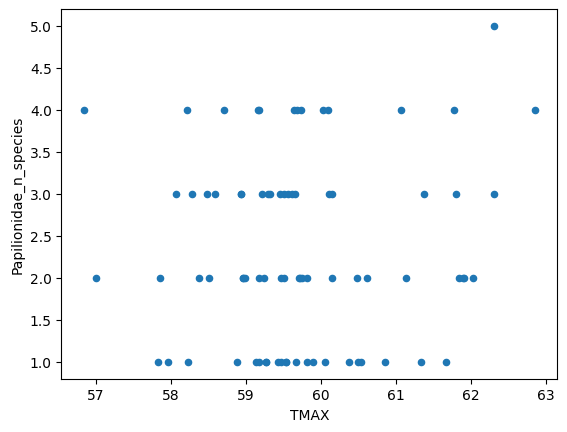

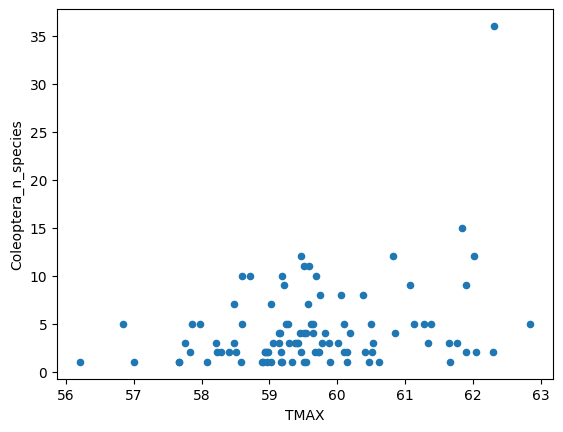

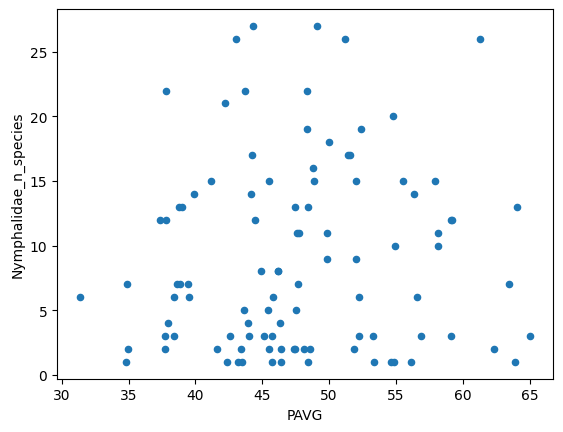

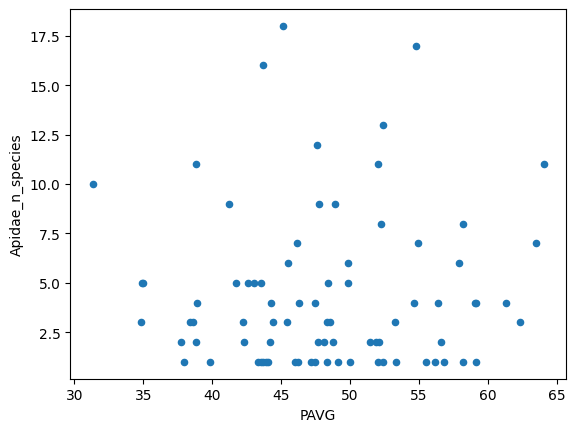

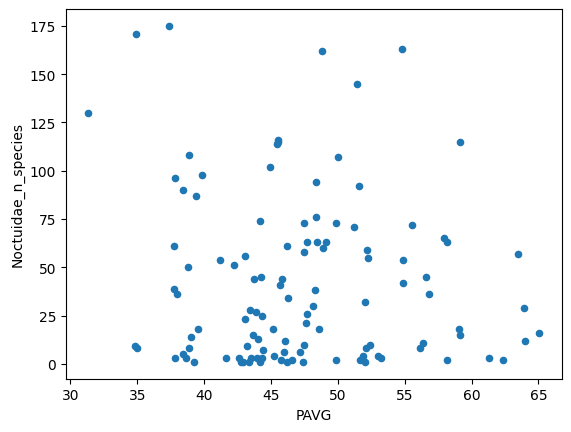

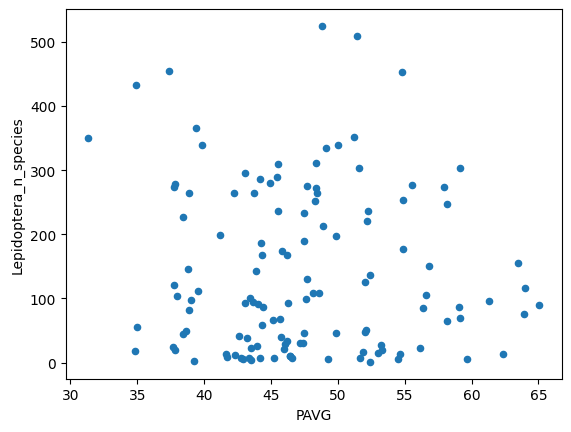

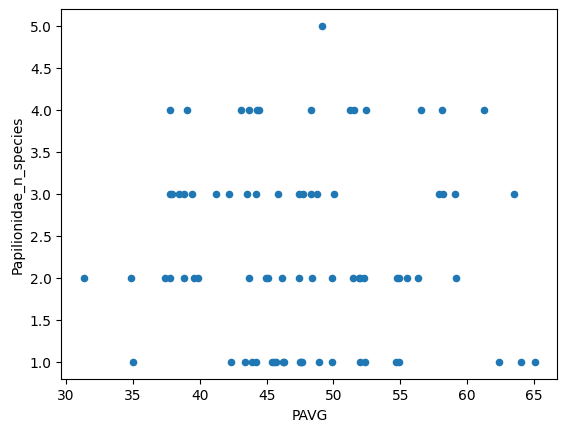

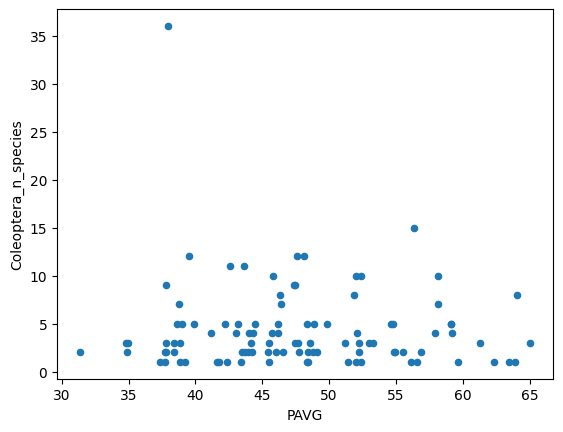

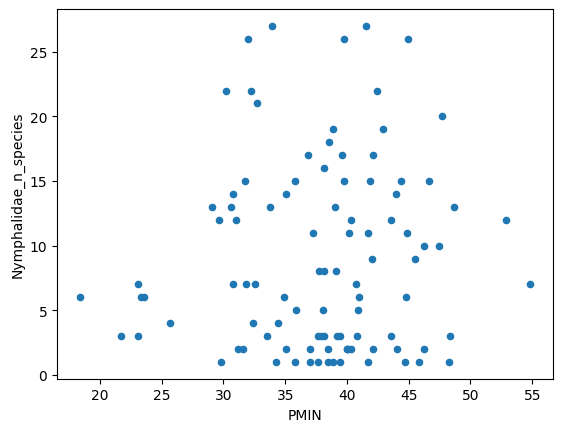

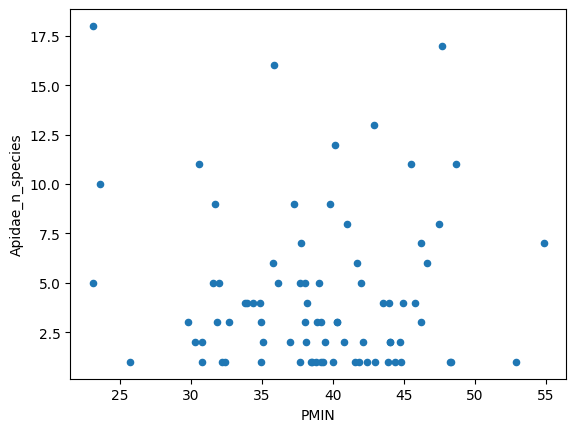

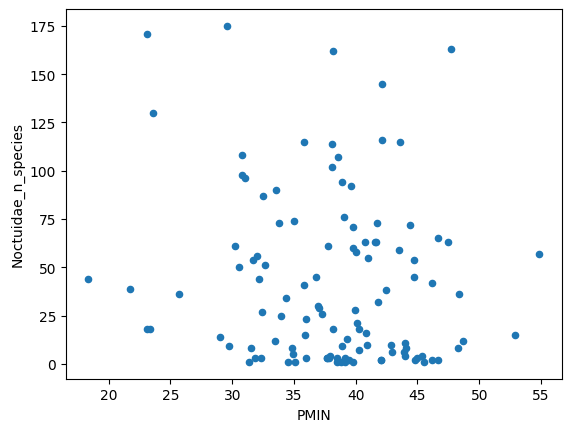

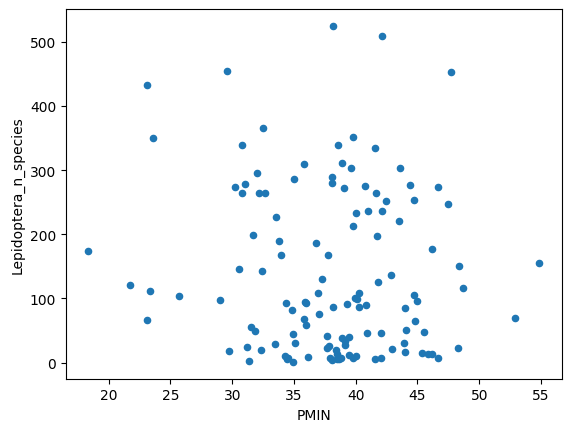

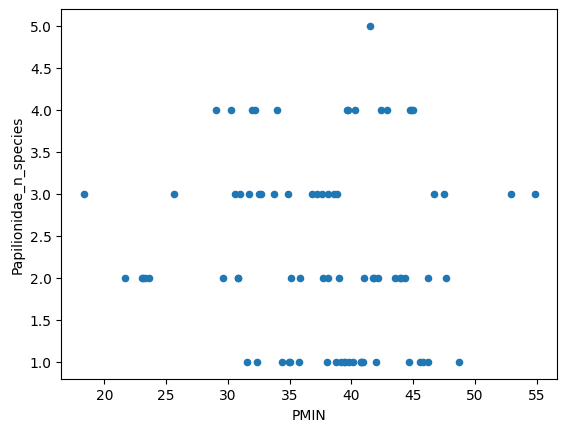

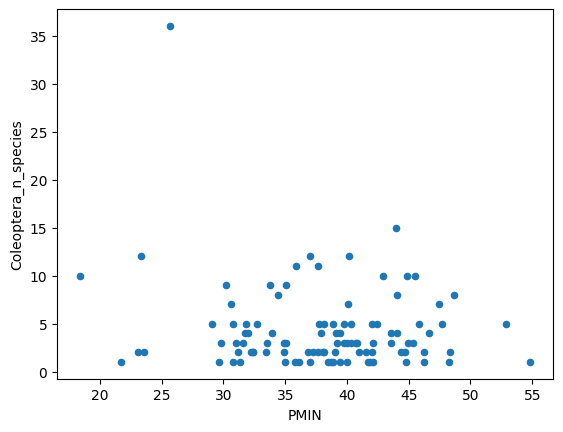

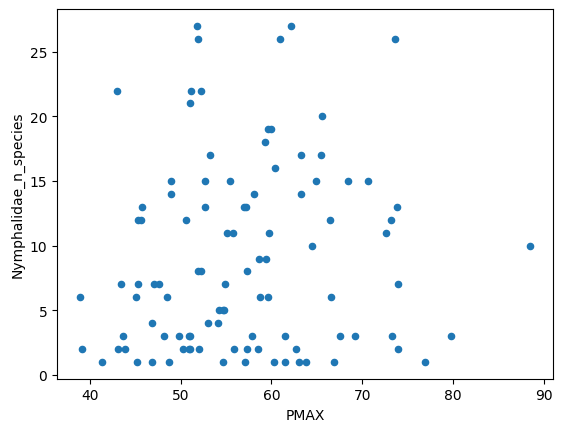

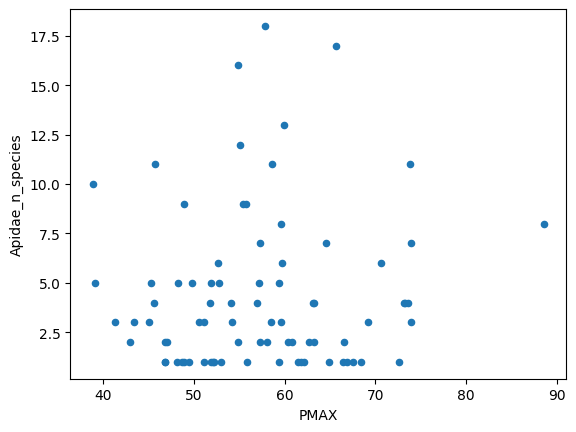

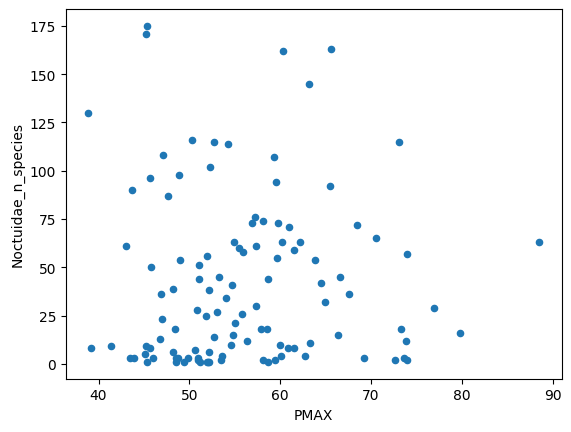

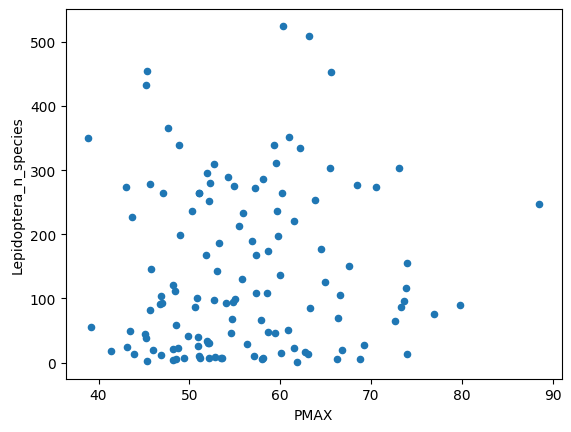

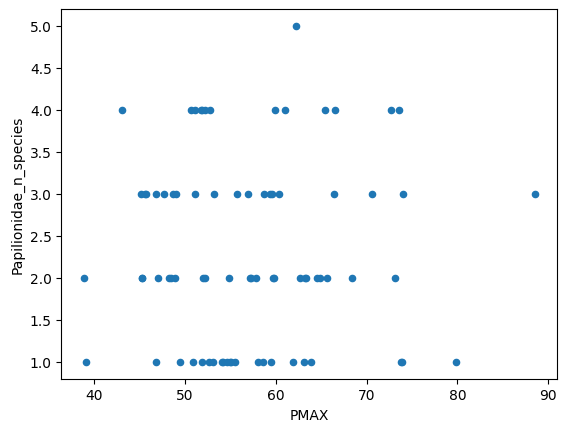

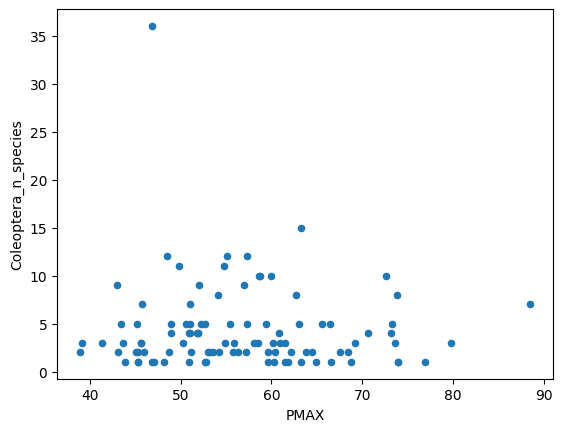

In [103]:
# Loop over selected columns for x-axis variables (columns 2 to 6)
for i in df_all.columns[2:7]:
   # Loop over selected columns for y-axis variables (columns 9 to 14)
  for j in df_all.columns[9:15]:
    # Create a scatter plot for each pair (i, j)
    df_all.plot.scatter(i, j)

### Comments:

- In the plots above, we see some trends between number of lepidoptera species per year and the climate variables, but the other taxa do not have clear patterns.
- Papillonidae does not seem to have enough data, likewise with Coleoptera with the exception of one datapoint.

In [104]:
# want temp/precip NAs to stay NA, but insect NAs should be 0? maybe remove all NAs?
# or can we just skip rows with NAs? there's an option in r... i think

## Run linear regressions on data
Will try all possible combinations - write as a loop?

In [105]:
# first a simple one
model = sm.OLS(df_all.PMAX,df_all.total_n_species)
result = model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.591    
Dependent Variable:     PMAX             AIC:                         1244.2017
Date:                   2025-04-26 19:19 BIC:                         1247.0220
No. Observations:       124              Log-Likelihood:              -621.10  
Df Model:               1                F-statistic:                 180.4    
Df Residuals:           123              Prob (F-statistic):          7.04e-26 
R-squared (uncentered): 0.595            Scale:                       1323.4   
----------------------------------------------------------------------------------
                       Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------------------
total_n_species        0.2054      0.0153    13.4330    0.0000    0.1751    0.2356
----------------------------------------------------

### Comments:

- This is a simple linear regression of PMAX (dependent variable) on total_n_species (independent variable), without including a constant (so it’s an uncentered model).

- The estimated coefficient for total_n_species is 0.2054, meaning: For each additional species observed, PMAX increases by about 0.205 units on average.

- The p-value for the coefficient is 0.0000, which is way below 0.05. This shows a statistically significant relationship between total species count and PMAX.

- The uncentered R-squared is 0.595, and the adjusted R-squared is 0.591. This means that about 59% of the variation in PMAX is explained by total species richness.



p
const    0.179935
PMAX     0.396994
dtype: float64
r2
0.005887160375903866


<Axes: xlabel='PMAX', ylabel='total_n_species'>

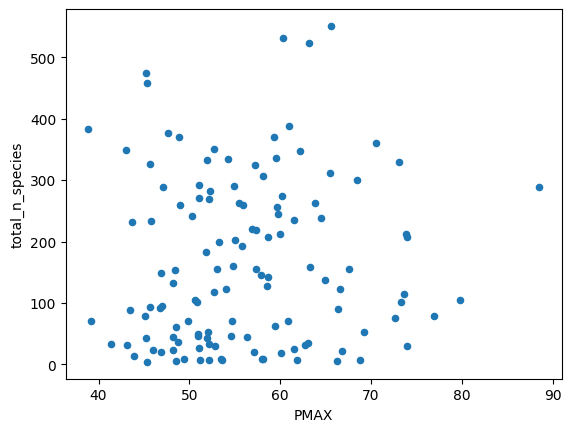

In [106]:
# test the code that gemini provided below
x = df_all['PMAX']
y = df_all['total_n_species']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

 # Extract p-value and R-squared
p_value = model.pvalues
r_squared = model.rsquared

print('p')
print(p_value)
print('r2')
print(r_squared)
df_all.plot.scatter('PMAX','total_n_species')

### Comments:
- There is a very weak positive association between PMAX and total insect species richness, but it is not meaningful (R² ≈ 0.006).
- The relationship is statistically insignificant and visually shows a scattered, random pattern.

In [107]:
# loop through climate and response vars?
# have done this in R, hoping to replicate process in Python
# prompt: loop through columns 2:7 as independent variables and 9:15 as dependent vars and run linear regressions for each combination of variables, saving the p and R2 values from each regression in a dataframe

# Assuming df_all is the DataFrame as defined in the previous code.
results = []

# Loop through independent variables (columns 2-7)
for indep_var in df_all.columns[1:7]:  # Assuming the independent vars start from the second column
    # Loop through dependent variables (columns 9-15)
    for dep_var in df_all.columns[8:15]:
        # Fit the linear regression model
        x = df_all[indep_var]
        y = df_all[dep_var]

        # Add a constant to the independent variable (intercept term)
        x = sm.add_constant(x)

        model = sm.OLS(y, x, missing='drop').fit() # drop rows with NA values rather than making them 0 or removing earlier

        # Extract p-value and R-squared
        p_value = model.pvalues[indep_var]
        r_squared = model.rsquared

        # Store results
        results.append([indep_var, dep_var, p_value, r_squared])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Independent Variable', 'Dependent Variable', 'P-value', 'R-squared'])

results_df.head()

,Independent Variable,Dependent Variable,P-value,R-squared
0,TMIN,total_n_species,0.133773,0.018333
1,TMIN,Nymphalidae_n_species,0.070231,0.033057
2,TMIN,Apidae_n_species,0.302107,0.013646
3,TMIN,Noctuidae_n_species,0.109077,0.023175
4,TMIN,Lepidoptera_n_species,0.180924,0.014624


### Comments
- Most relationships show high p-values and low R² values, indicating weak or no significant associations.
- A few exceptions (like TMIN vs Coleoptera and TAVG vs Coleoptera) show relatively stronger signals, but still modest.
- Climate variables alone explain very little of the variation in insect richness across the dataset.

In [108]:
# check for anything marginally significant
results_df[results_df['P-value'] < 0.1]

,Independent Variable,Dependent Variable,P-value,R-squared
1,TMIN,Nymphalidae_n_species,0.070231,0.033057
6,TMIN,Coleoptera_n_species,0.052552,0.037810
13,TAVG,Coleoptera_n_species,0.008506,0.068547
20,TMAX,Coleoptera_n_species,0.001675,0.096323


A few significant relationships:
* tmin vs nymphalidae n species (p < 0.1)
* tmin vs coleoptera n species (p < 0.1)
* tmax vs coleoptera n species (p < 0.05)
* tavg vs coleoptera n species (p < 0.05)

Nothing for precipitation, nothing for our most abundant taxonomic groups.

Even for these 'significant' taxa, the r2 values are poor.

In [109]:
# save statistics results
# consider running again with only up to 2000 - but then lose some of the climate nuance

results_df.to_csv('insect_climate_regression_stats_20250425.csv', index=False)

# Make nice plots for presentation
* temp vs year
* precip vs year
* temp vs precip
* temp vs n species (whichever are sig.)
  * coleoptera vs tmax, nymphalidae vs tmin, , coleoptera tmax, coleoptera tavg
* precip vs n species (whichever are sig.)
  * none
* insect data vs year and/or hist of insect data

In [110]:
df_all.columns

Index(['DATE', 'TMIN', 'TAVG', 'TMAX', 'PAVG', 'PMIN', 'PMAX', 'stateProvince',
       'total_n_species', 'Nymphalidae_n_species', 'Apidae_n_species',
       'Noctuidae_n_species', 'Lepidoptera_n_species',
       'Papilionidae_n_species', 'Coleoptera_n_species'],
      dtype='object')

### Temperature vs year

In [111]:
# format to have date, temp, temp val cols
df_temp = df_all.melt(id_vars = 'DATE', value_vars=['TMIN', 'TMAX', 'TAVG'])
df_temp.head()

,DATE,variable,value
0,1901,TMIN,39.242857
1,1902,TMIN,39.600000
2,1903,TMIN,38.928571
3,1904,TMIN,35.600000
4,1905,TMIN,38.480000


### Plot: Temperature Trends Over Time (Yearly Data)

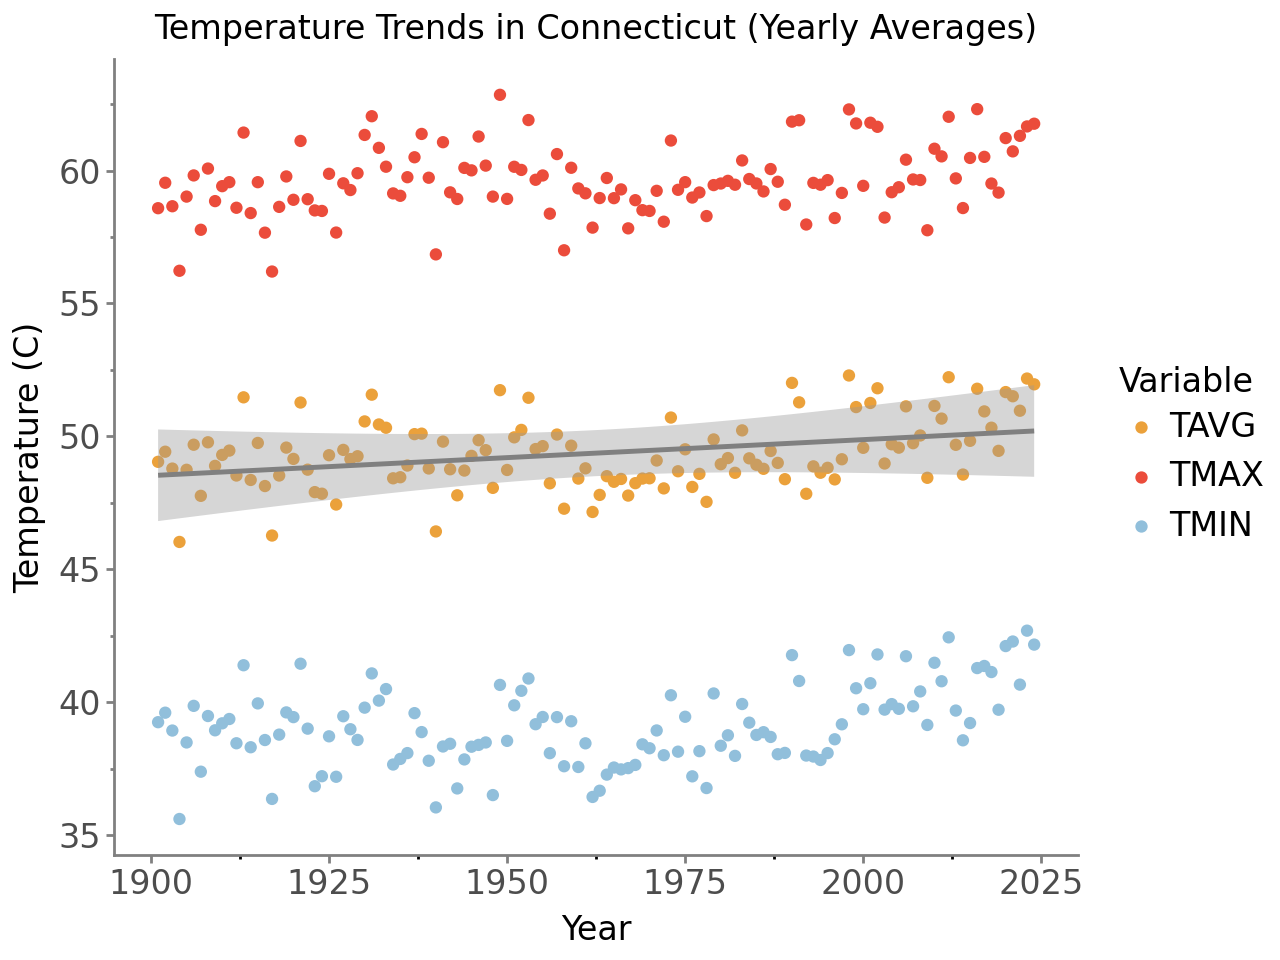

In [112]:
# temp vs year
t = (
  ggplot(df_temp, aes(x='DATE', y='value', color = 'variable'))
    + geom_point()
    + geom_smooth(method='lm', color='gray')
    + xlab("Year")
    + ylab("Temperature (C)")
    + labs(color='Variable')
    + ggtitle("Temperature Trends in Connecticut (Yearly Averages)")
    + theme_classic()
    + theme(axis_line=element_line(color="gray"),
            axis_ticks=element_line(color = "gray"),
            text=element_text(size = 12),
            legend_position="right")
    + scale_colour_manual(values=['#eba13b', '#eb4c3b', '#91bfdb'])
)

# View plot
t

In [113]:
# Save Plot
ggsave(t, 'temp_year.png')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: temp_year.png


### Comments:

- Temperatures in Connecticut show a slight upward trend over time, especially for minimum temperatures (TMIN). TAVG and TMAX remain relatively stable but exhibit modest increases in recent decades. Minimum temperatures appear to be rising faster than average or maximum temperatures.

### Precipation vs year

In [114]:
# format to have date, prec, prec val cols
df_prcp = df_all.melt(id_vars = 'DATE', value_vars=['PMIN', 'PMAX', 'PAVG'])
df_prcp.head()

,DATE,variable,value
0,1901,PMIN,38.67
1,1902,PMIN,34.96
2,1903,PMIN,34.44
3,1904,PMIN,38.05
4,1905,PMIN,36.13


### Plot: Precipitation Trends Over Time (Yearly Data)

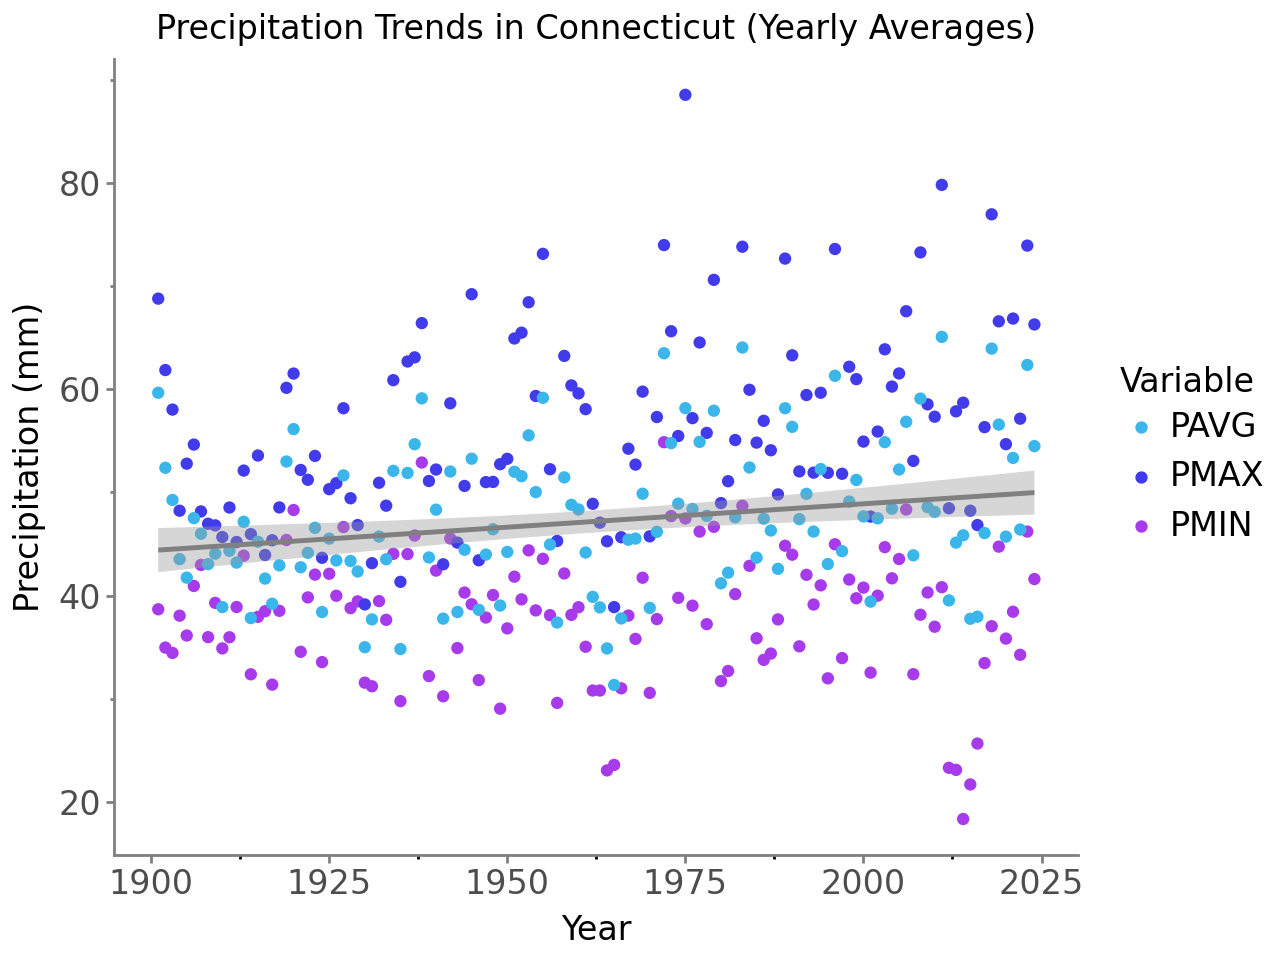

In [115]:
# prec vs year
p = (
  ggplot(df_prcp, aes(x='DATE', y='value', color = 'variable'))
    + geom_point()
    + geom_smooth(method='lm', color='gray')
    + xlab("Year")
    + ylab("Precipitation (mm)")
    + labs(color='Variable')
    + ggtitle("Precipitation Trends in Connecticut (Yearly Averages)")
    + theme_classic()
    + theme(axis_line=element_line(color="gray"),
            axis_ticks=element_line(color = "gray"),
            text=element_text(size = 12),
            legend_position="right")
    + scale_colour_manual(values=['#3bb6eb', '#413beb', '#a73beb'])
)

p


In [116]:
# Save Plot
ggsave(p, 'prcp_year.png')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: prcp_year.png


### Comments:

- Precipitation levels in Connecticut show a slight increasing trend over time across all measures (PAVG, PMAX, PMIN). PMAX (maximum precipitation) displays the greatest variability and appears to drive much of the overall increase. Wetter conditions have become more common in recent decades.

### Insect data vs year

In [117]:
df_all.columns

Index(['DATE', 'TMIN', 'TAVG', 'TMAX', 'PAVG', 'PMIN', 'PMAX', 'stateProvince',
       'total_n_species', 'Nymphalidae_n_species', 'Apidae_n_species',
       'Noctuidae_n_species', 'Lepidoptera_n_species',
       'Papilionidae_n_species', 'Coleoptera_n_species'],
      dtype='object')

In [118]:
# format to have date, n species, n species val cols
df_ent = df_all.melt(id_vars = 'DATE', value_vars=['total_n_species', 'Lepidoptera_n_species', 'Coleoptera_n_species', 'Apidae_n_species'])
df_ent.head()

,DATE,variable,value
0,1901,total_n_species,7.0
1,1902,total_n_species,7.0
2,1903,total_n_species,9.0
3,1904,total_n_species,45.0
4,1905,total_n_species,30.0


### Plot: Trends in Insect Species Counts Over Time

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 68 rows containing missing values.


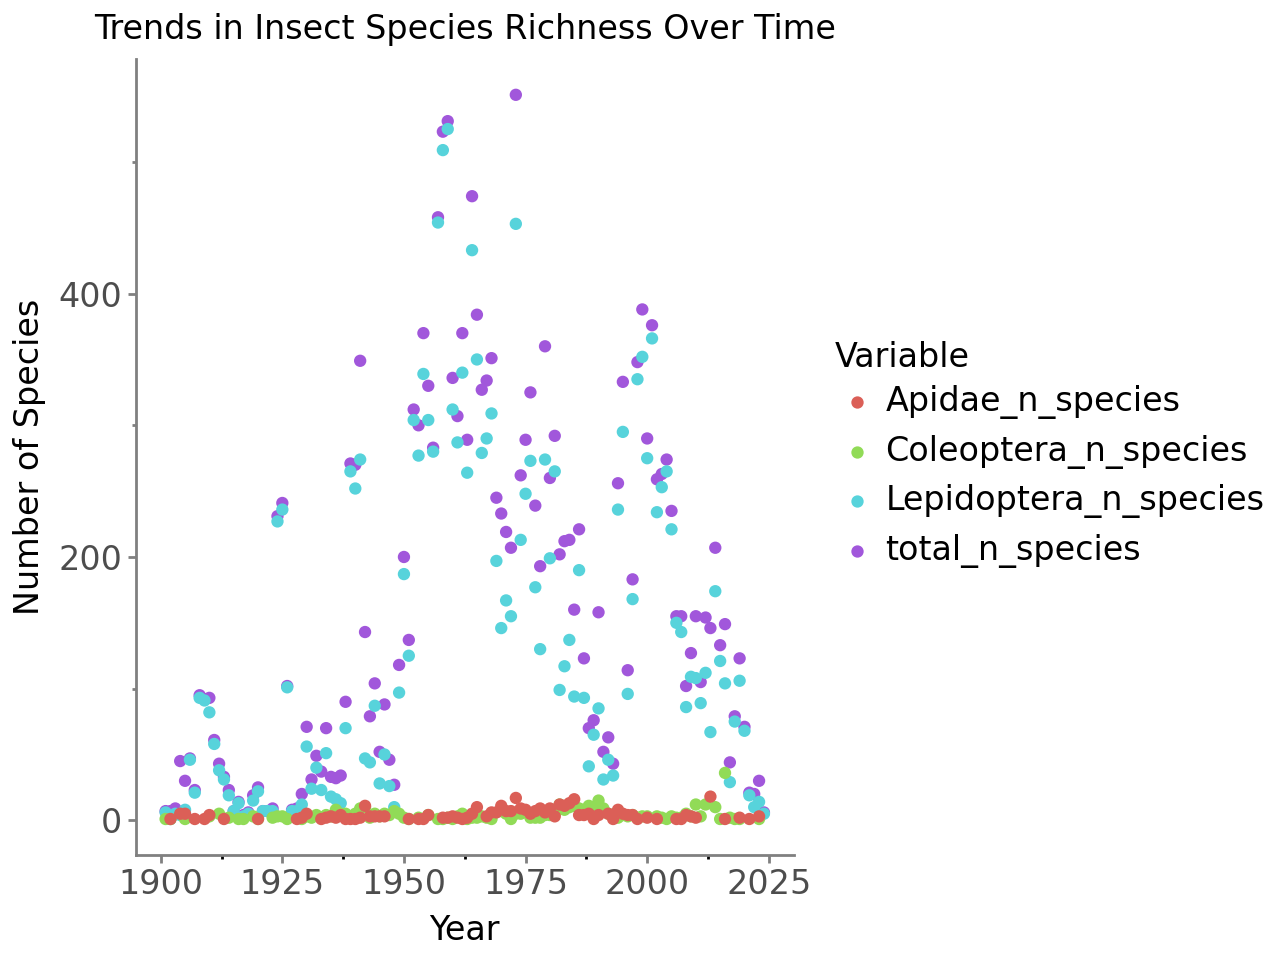

In [119]:
# insect n species vs year
i = (
  ggplot(df_ent, aes(x='DATE', y='value', color = 'variable'))
    + geom_point()
    + xlab("Year")
    + ylab("Number of Species")
    + labs(color='Variable')
    + ggtitle("Trends in Insect Species Richness Over Time")
    + theme_classic()
    + theme(axis_line=element_line(color="gray"),
            axis_ticks=element_line(color = "gray"),
            text=element_text(size = 12),
            legend_position="right")
    # + scale_colour_manual(values=['#3bb6eb', '#413beb', '#a73beb'])
)
i

In [120]:
# Save plot
ggsave(i, 'ent_groups_year.png')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ent_groups_year.png
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 68 rows containing missing values.


### Comments:

- Insect species richness peaked around the mid-20th century and has declined sharply since then. Lepidoptera (butterflies and moths) dominate the overall pattern, driving the trends in total species richness. Apidae and Coleoptera richness remained relatively low and stable over time.

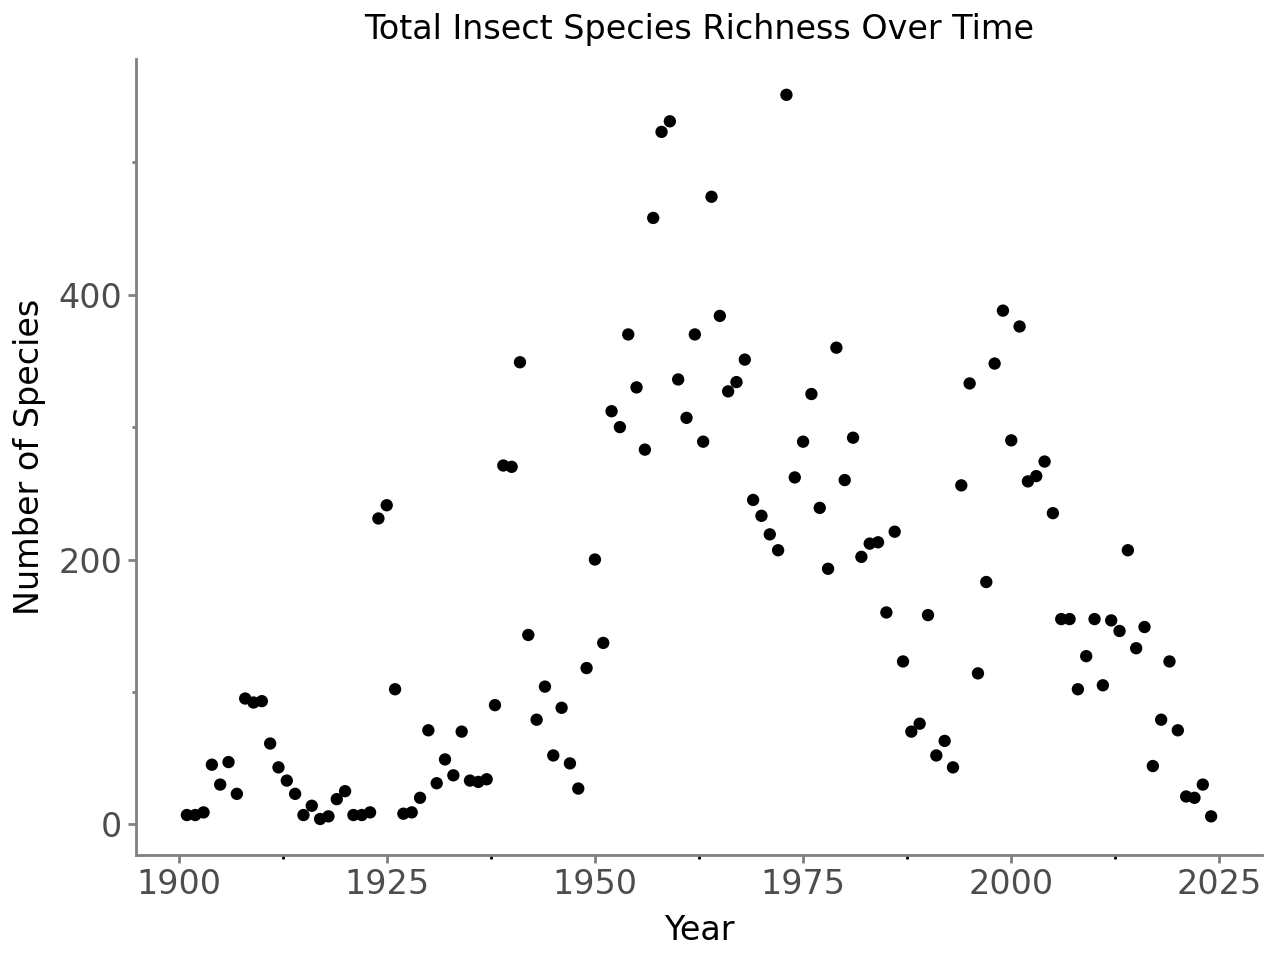

In [121]:
total = (
  ggplot(df_all, aes(x='DATE', y='total_n_species'))
    + geom_point()
    # + geom_smooth(method='lm', color='gray')
    + xlab("Year")
    + ylab("Number of Species")
    + labs(color='Variable')
    + ggtitle("Total Insect Species Richness Over Time")
    + theme_classic()
    + theme(axis_line=element_line(color="gray"),
            axis_ticks=element_line(color = "gray"),
            text=element_text(size = 12),
            legend_position="right")
)

total

In [122]:
#save plot
ggsave(total, 'total_n_species_year.png')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: total_n_species_year.png


### Comments:

- Insect species richness peaked around the mid-20th century and has declined shTotal insect species richness increased steadily until around 1960–1970, then declined sharply afterward. The decline appears consistent and sustained, suggesting possible long-term environmental or sampling changes.

### Temperature vs precipitation

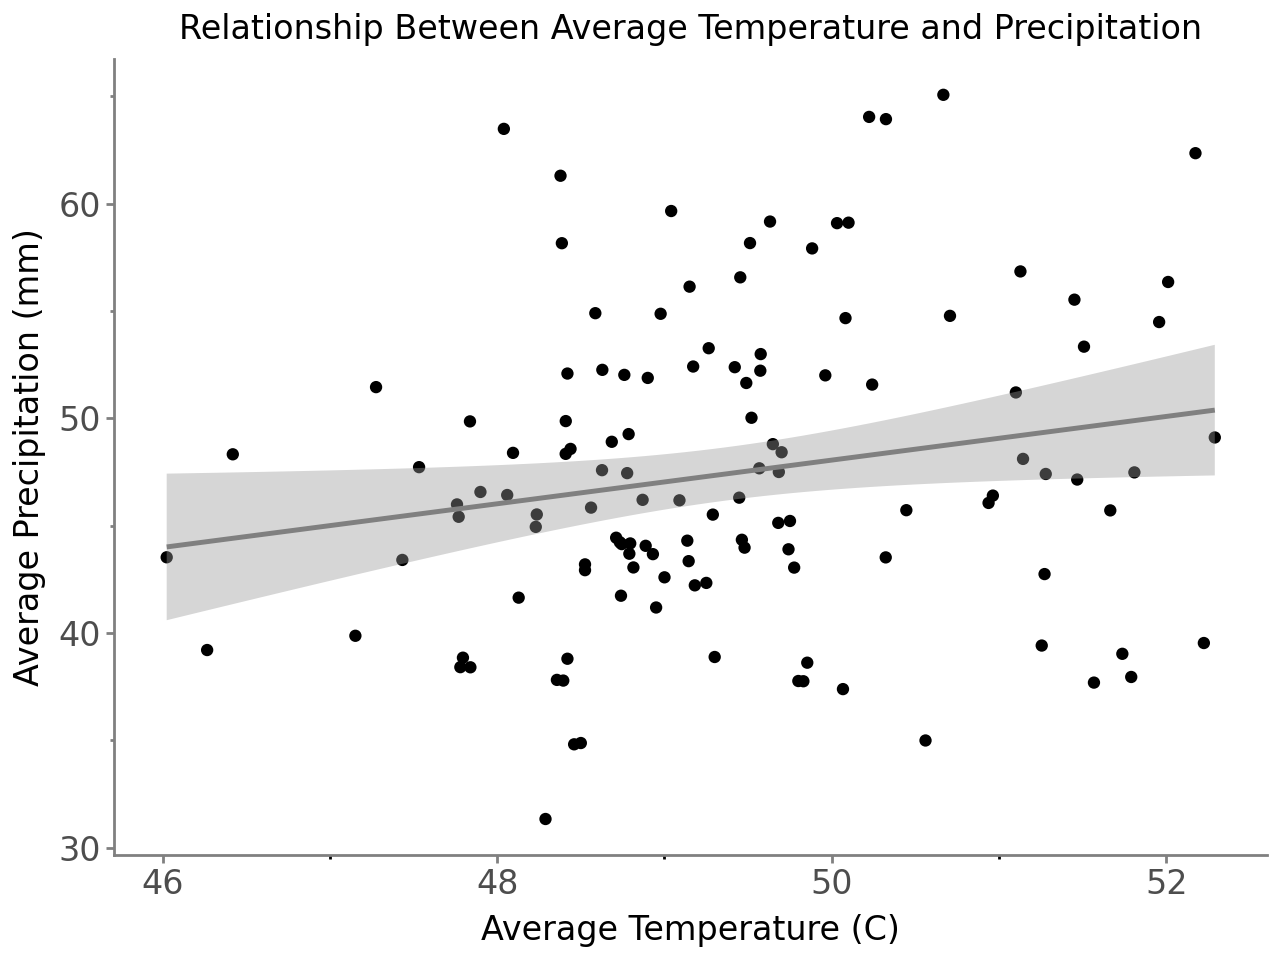

In [123]:
tp = (
  ggplot(df_all, aes(x='TAVG', y='PAVG'))
    + geom_point()
    + geom_smooth(method='lm', color='gray')
    + xlab("Average Temperature (C)")
    + ylab("Average Precipitation (mm)")
    + labs(color='Variable')
    + ggtitle("Relationship Between Average Temperature and Precipitation")
    + theme_classic()
    + theme(axis_line=element_line(color="gray"),
            axis_ticks=element_line(color = "gray"),
            text=element_text(size = 12),
            legend_position="right")
)
tp
# this doesn't show anything, not saving

### Comments:

- There is a very weak positive relationship between average temperature and average precipitation. The points are widely scattered, indicating no strong or consistent pattern between the two variables.

### Insects vs temperature (significant)

### Coleoptera vs tmax

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 24 rows containing missing values.


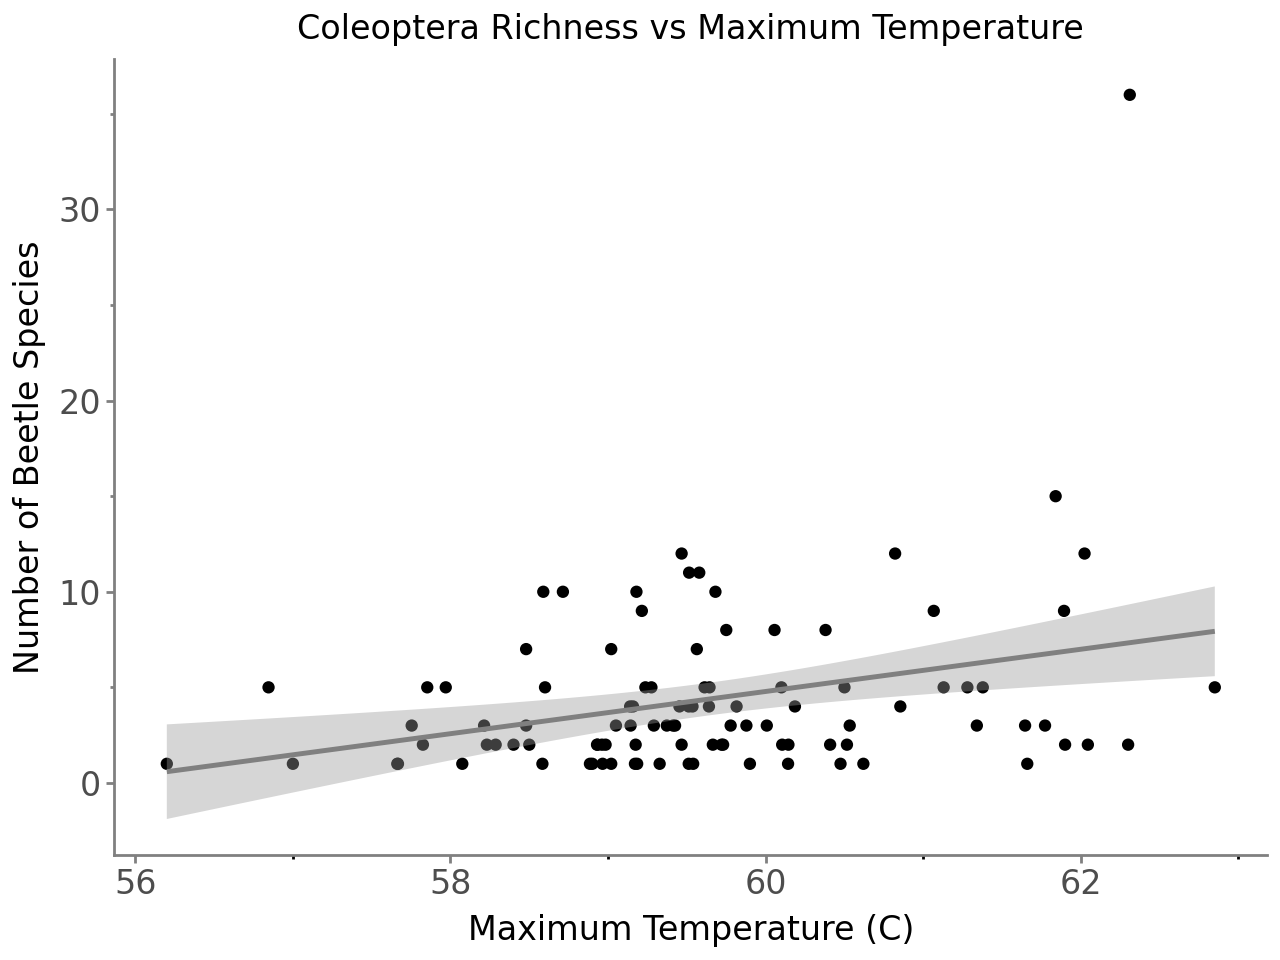

In [124]:
# coleoptera vs tmax
col_tmax = (
  ggplot(df_all, aes(x='TMAX', y='Coleoptera_n_species'))
    + geom_point()
    + geom_smooth(method='lm', color='gray')
    + xlab("Maximum Temperature (C)")
    + ylab("Number of Beetle Species")
    + labs(color='Variable')
    + ggtitle("Coleoptera Richness vs Maximum Temperature")
    + theme_classic()
    + theme(axis_line=element_line(color="gray"),
            axis_ticks=element_line(color = "gray"),
            text=element_text(size = 12),
            legend_position="right")
)
col_tmax

In [125]:
# save plot
ggsave(col_tmax, 'coleoptera_tmax.png')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: coleoptera_tmax.png
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 24 rows containing missing values.


### Comments:

- There is a weak positive relationship between maximum temperature and Coleoptera (beetle) species richness. As maximum temperatures increase, beetle richness tends to rise slightly, but the overall spread remains wide.

### Coleoptera tmin

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 24 rows containing missing values.


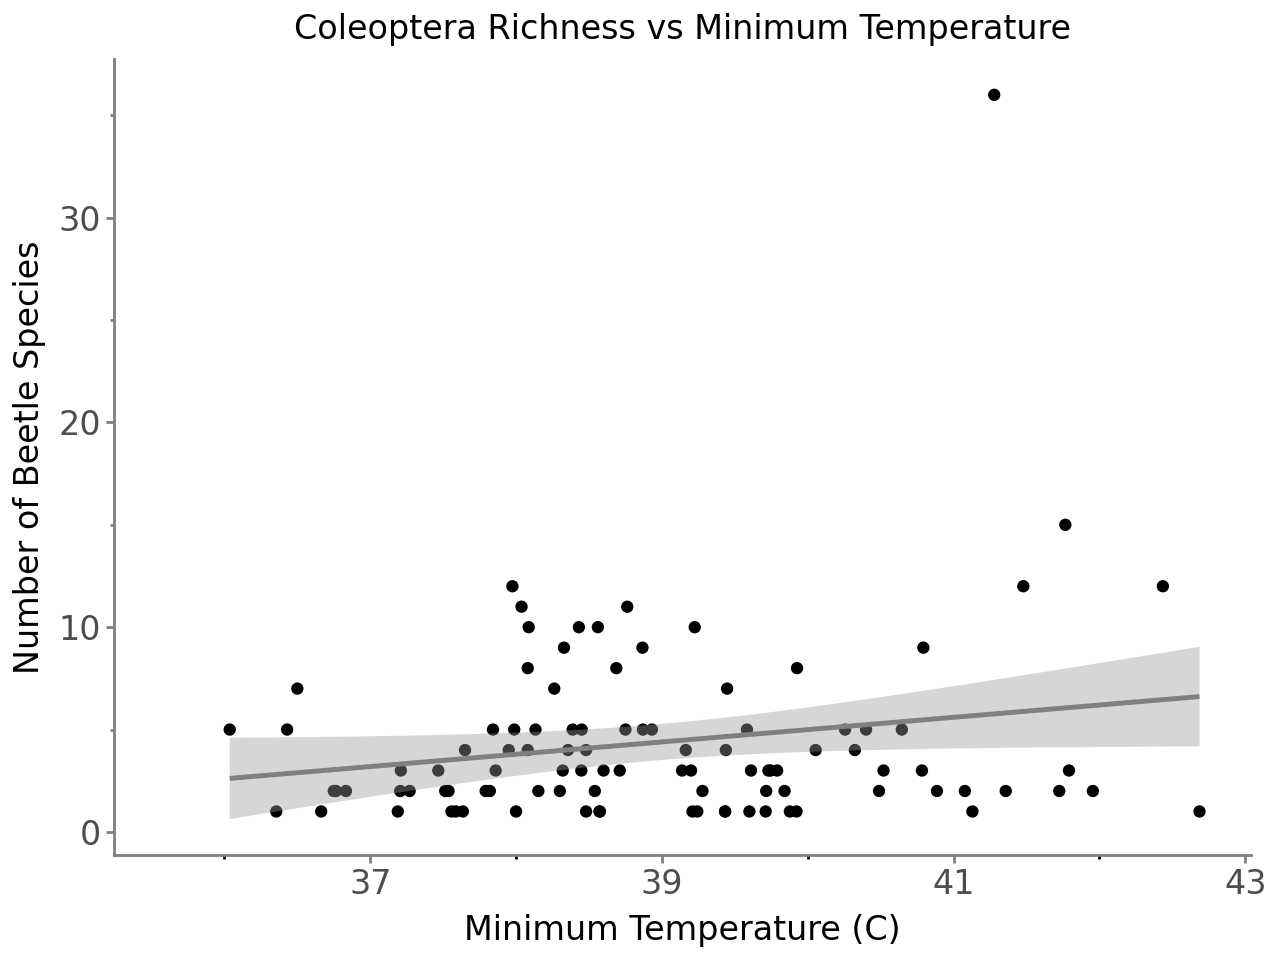

In [126]:
# coleoptera tmin
col_tmin = (
  ggplot(df_all, aes(x='TMIN', y='Coleoptera_n_species'))
    + geom_point()
    + geom_smooth(method='lm', color='gray')
    + xlab("Minimum Temperature (C)")
    + ylab("Number of Beetle Species")
    + labs(color='Variable')
    + ggtitle("Coleoptera Richness vs Minimum Temperature")
    + theme_classic()
    + theme(axis_line=element_line(color="gray"),
            axis_ticks=element_line(color = "gray"),
            text=element_text(size = 12),
            legend_position="right")
)
col_tmin

In [127]:
# save plot
ggsave(col_tmax, 'coleoptera_tmin.png')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: coleoptera_tmin.png
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 24 rows containing missing values.


### Comments:

- Coleoptera (beetle) species richness shows a weak positive association with minimum temperature. Higher minimum temperatures are slightly linked to more beetle species, but the scatter remains broad and variable.

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 24 rows containing missing values.


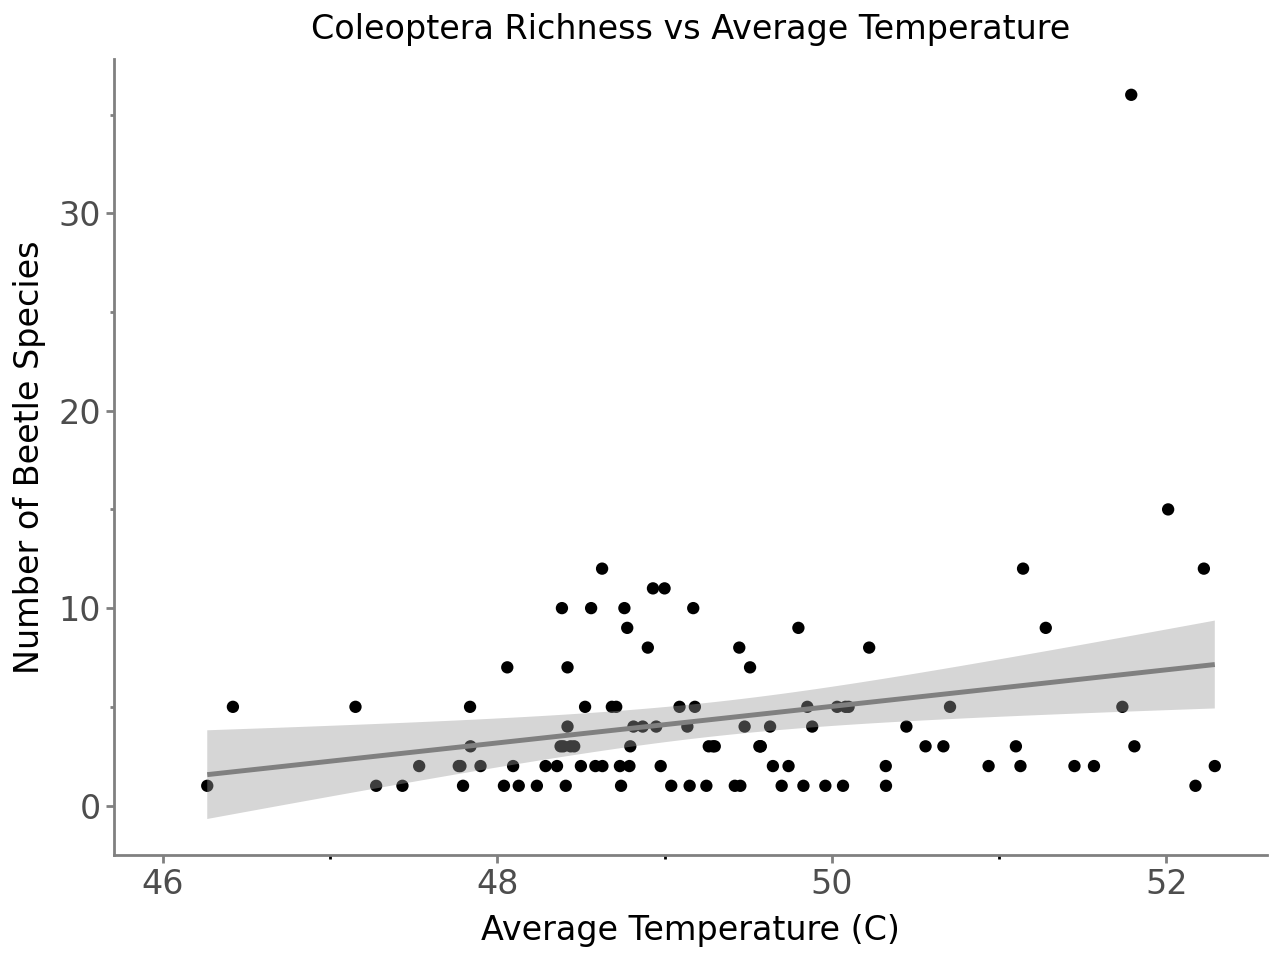

In [128]:
# coleoptera tavg
col_tavg = (
  ggplot(df_all, aes(x='TAVG', y='Coleoptera_n_species'))
    + geom_point()
    + geom_smooth(method='lm', color='gray')
    + xlab("Average Temperature (C)")
    + ylab("Number of Beetle Species")
    + labs(color='Variable')
    + ggtitle("Coleoptera Richness vs Average Temperature")
    + theme_classic()
    + theme(axis_line=element_line(color="gray"),
            axis_ticks=element_line(color = "gray"),
            text=element_text(size = 12),
            legend_position="right")
)
col_tavg

In [129]:
# save plot
ggsave(col_tavg, 'coleoptera_tavg.png')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: coleoptera_tavg.png
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 24 rows containing missing values.


### Comments:

- Coleoptera (beetle) species richness increases slightly with higher average temperatures. However, the overall relationship remains weak, with a wide spread of species counts at each temperature level.

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 24 rows containing missing values.


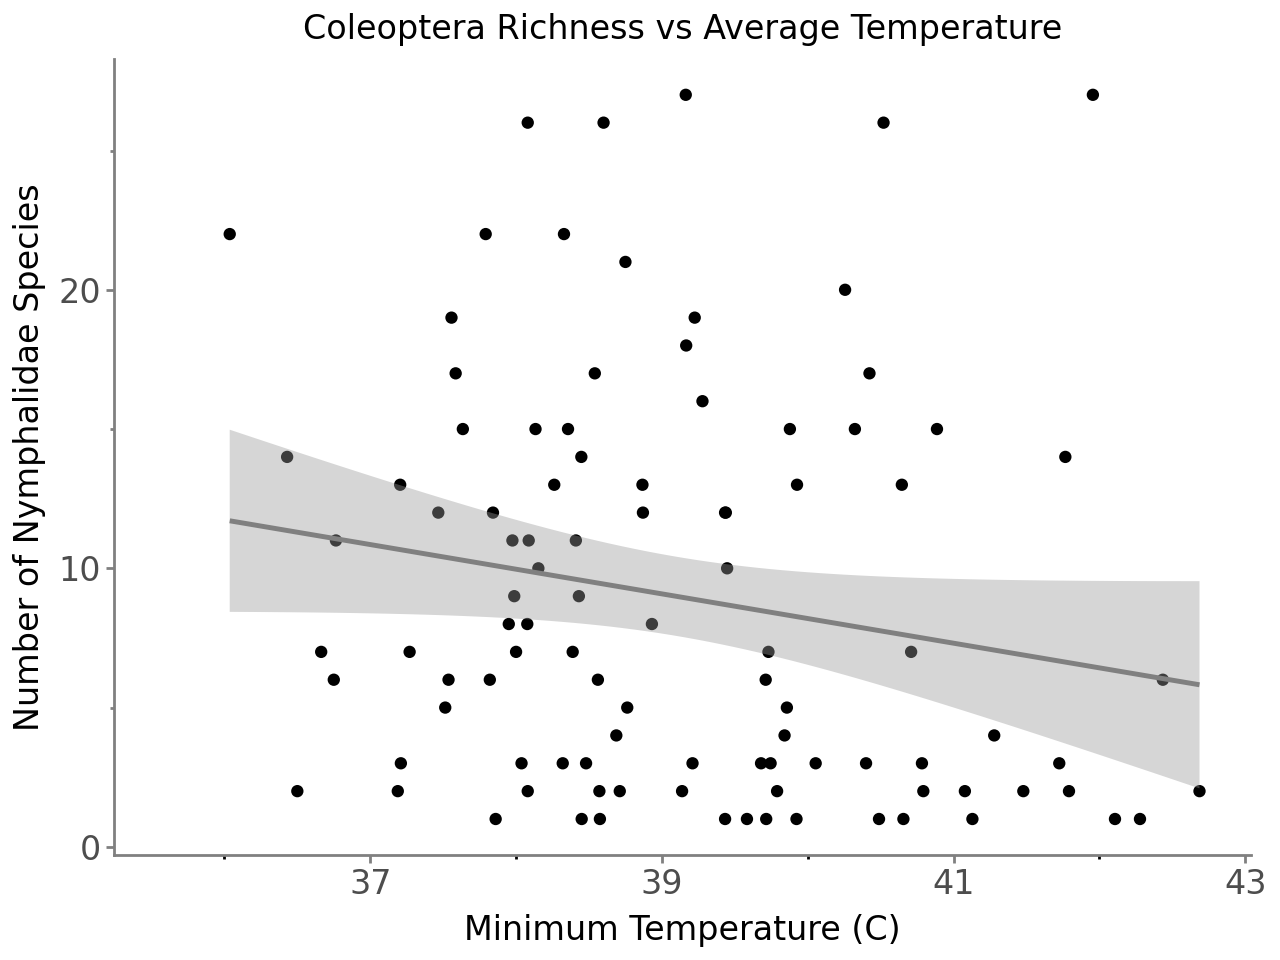

In [130]:
# nymphalidae vs tmin
nym_tmin = (
  ggplot(df_all, aes(x='TMIN', y='Nymphalidae_n_species'))
    + geom_point()
    + geom_smooth(method='lm', color='gray')
    + xlab("Minimum Temperature (C)")
    + ylab("Number of Nymphalidae Species")
    + labs(color='Variable')
    + ggtitle("Coleoptera Richness vs Average Temperature")
    + theme_classic()
    + theme(axis_line=element_line(color="gray"),
            axis_ticks=element_line(color = "gray"),
            text=element_text(size = 12),
            legend_position="right")
)
nym_tmin

In [131]:
# save plot
ggsave(nym_tmin, 'nymphalidae_tmin.png')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: nymphalidae_tmin.png
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 24 rows containing missing values.


### Comments:

- Nymphalidae species richness shows a weak negative relationship with minimum temperature. Higher minimum temperatures are slightly associated with fewer butterfly species, but the spread remains wide.